In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/WA_Fn-UseC_-Telco-Customer-Churn.csv


# **Table of Contents**

* [Problem Definition](#define)
* [Data Preprocessing](#datapre)
    * [Load Dataset](#load)
    * [Data Summarization Statistics](#overview)
    * [Data Cleaning](#cleaning)
    * [Data Transformation](#transform)
* [EDA](#visualization)
    * [Descriptive Analysis](#descanalysis)
        * [for Categorical Variables](#catanalysis)
        * [for Numerical Variables](#numanalysis)
    * [Correlation Analysis](#correlation)
    * [Multivariate Analysis](#multianalysis)
        * [Churn vs Numeric Features](#vsnum)
        * [Churn vs Categorical Features](#vscor)
        * [Statistical Test (Chi-Square Test)](#chisquare)
        * [Cramer's V](#cramers)
        * [Churn vs Contract + Payment Method](#contract)
        * [Churn vs Paperless Billing + Senior Citizen](#paperless)
        * [Churn vs Adds-On Services](#addons)
        * [Churn vs Customer's Identity](#custid)
* [Export Dataset](#export)

# **Problem Definition** <a class="anchor"  id="define"></a>

This project aims **to predict customer churn for a telecommunications company** using the Telco Customer Churn dataset. The dataset includes customer demographics, subscription details, service usage, and billing information. The main objective is to analyze the cause why customer churns and reduce the churn rate. By identifying the causes, the company can take proactive steps—such as offering personalized promotions or improving service quality—to reduce churn and improve customer retention. The target variable is Churn, and relevant features include tenure, contract type, monthly charges, and service subscriptions. 

# **Data Preprocessing** <a class="anchor"  id="datapre"></a>

## **Load Dataset** <a class="anchor"  id="load"></a>

In [47]:
ori_df = pd.read_csv('/kaggle/input/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(ori_df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

## Data Summarization Statistics <a class="anchor"  id="overview"></a>

In [48]:
ori_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [49]:
ori_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Cleaning <a class="anchor"  id="cleaning"></a>

In [50]:
ori_df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [51]:
ori_df.duplicated().sum()

0

In [52]:
ori_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [53]:
df = ori_df.copy()

#Rename column(s)
df.rename(columns={'gender': 'Gender'}, inplace=True)	
df.rename(columns={'tenure': 'Tenure'}, inplace=True)
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

df

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Data Transformation <a class="anchor"  id="transform"></a>

In [54]:
# show blank or whitespace values
blank_mask = df.map(lambda x: isinstance(x, str) and x.strip() == '')
rows_with_blanks = df[blank_mask.any(axis=1)]
print(rows_with_blanks)

blank_counts = df.apply(lambda col: col.apply(lambda x: isinstance(x, str) and x.strip() == '').sum())
print("Blank/whitespace entry count per column:\n", blank_counts)

      customerID  Gender SeniorCitizen Partner Dependents  Tenure  \
488   4472-LVYGI  Female            No     Yes        Yes       0   
753   3115-CZMZD    Male            No      No        Yes       0   
936   5709-LVOEQ  Female            No     Yes        Yes       0   
1082  4367-NUYAO    Male            No     Yes        Yes       0   
1340  1371-DWPAZ  Female            No     Yes        Yes       0   
3331  7644-OMVMY    Male            No     Yes        Yes       0   
3826  3213-VVOLG    Male            No     Yes        Yes       0   
4380  2520-SGTTA  Female            No     Yes        Yes       0   
5218  2923-ARZLG    Male            No     Yes        Yes       0   
6670  4075-WKNIU  Female            No     Yes        Yes       0   
6754  2775-SEFEE    Male            No      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753      

In [55]:
blank_entries = df[df['TotalCharges'] == ' ']
blank_entries

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### Possible cause of missing values in TotalCharges:
These missing values are likely belong to customers with tenure = 0, meaning they **just signed up and haven't been billed** yet. Therefore, we will fill the total charges with 0 for them.

In [56]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [57]:
# Convert to decimal type
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [58]:
#Convert to categorical type
df['Gender'] = df['Gender'].astype('category')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df['Partner'] = df['Partner'].astype('category')
df['Dependents'] = df['Dependents'].astype('category')
df['PhoneService'] = df['PhoneService'].astype('category')
df['MultipleLines'] = df['MultipleLines'].astype('category')
df['InternetService'] = df['InternetService'].astype('category')
df['OnlineSecurity'] = df['OnlineSecurity'].astype('category')
df['OnlineBackup'] = df['OnlineBackup'].astype('category')
df['DeviceProtection'] = df['DeviceProtection'].astype('category')
df['TechSupport'] = df['TechSupport'].astype('category')
df['StreamingTV'] = df['StreamingTV'].astype('category')
df['StreamingMovies'] = df['StreamingMovies'].astype('category')
df['Contract'] = df['Contract'].astype('category')
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category')
df['PaymentMethod'] = df['PaymentMethod'].astype('category')
df['Churn'] = df['Churn'].astype('category')

In [59]:
internet_extras_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df['HasInternetExtras'] = df[internet_extras_cols].apply(
    lambda row: 'Yes' if any(row == 'Yes') else 'No', axis=1
)

In [60]:
df.dtypes

customerID             object
Gender               category
SeniorCitizen        category
Partner              category
Dependents           category
Tenure                  int64
PhoneService         category
MultipleLines        category
InternetService      category
OnlineSecurity       category
OnlineBackup         category
DeviceProtection     category
TechSupport          category
StreamingTV          category
StreamingMovies      category
Contract             category
PaperlessBilling     category
PaymentMethod        category
MonthlyCharges        float64
TotalCharges          float64
Churn                category
HasInternetExtras      object
dtype: object

# **EDA** <a class="anchor"  id="visualization"></a>

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", message=".*observed=False.*")
warnings.filterwarnings("ignore")  

sns.set(style="whitegrid")

## Descriptive Analysis <a class="anchor" id="descanalysis"></a>

### for Categorical Variables <a class="anchor" id="catanalysis"></a>

In [62]:
# Frequency counts of each category
print(df['Churn'].value_counts())

# Proportion of each category
print(df['Churn'].value_counts(normalize=True))

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [63]:
print(df['Gender'].value_counts())
print(df['Gender'].value_counts(normalize=True))
print()
print(df['SeniorCitizen'].value_counts())
print(df['SeniorCitizen'].value_counts(normalize=True))
print()
print(df['Dependents'].value_counts())
print(df['Dependents'].value_counts(normalize=True))

Gender
Male      3555
Female    3488
Name: count, dtype: int64
Gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64
SeniorCitizen
No     0.837853
Yes    0.162147
Name: proportion, dtype: float64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64


In [64]:
print("PHONE SERVICE")
print(df['PhoneService'].value_counts())
print(df['PhoneService'].value_counts(normalize=True))
print()
print(df['MultipleLines'].value_counts())
print(df['MultipleLines'].value_counts(normalize=True))

PHONE SERVICE
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
PhoneService
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
MultipleLines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64


INTERNET SERVICE
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
InternetService
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64


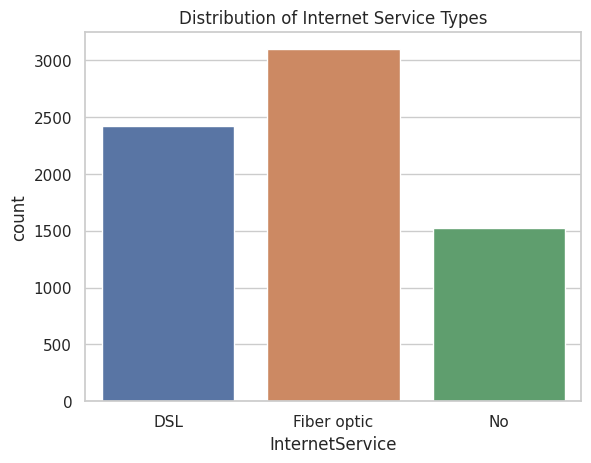


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineSecurity
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: proportion, dtype: float64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: proportion, dtype: float64

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: proportion, dtype: float64

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     0.493114
Yes                    

In [65]:
print("INTERNET SERVICE")
print(df['InternetService'].value_counts())
print(df['InternetService'].value_counts(normalize=True))
sns.countplot(data=df, x='InternetService')
plt.title('Distribution of Internet Service Types')
plt.show()
print()
print(df['OnlineSecurity'].value_counts())
print(df['OnlineSecurity'].value_counts(normalize=True))
print()
print(df['OnlineBackup'].value_counts())
print(df['OnlineBackup'].value_counts(normalize=True))
print()
print(df['DeviceProtection'].value_counts())
print(df['DeviceProtection'].value_counts(normalize=True))
print()
print(df['TechSupport'].value_counts())
print(df['TechSupport'].value_counts(normalize=True))
print()
print(df['StreamingTV'].value_counts())
print(df['StreamingTV'].value_counts(normalize=True))
print()
print(df['StreamingMovies'].value_counts())
print(df['StreamingMovies'].value_counts(normalize=True))

In [66]:
print(df['Contract'].value_counts())
print(df['Contract'].value_counts(normalize=True))
print()
print(df['PaperlessBilling'].value_counts())
print(df['PaperlessBilling'].value_counts(normalize=True))
print()
print(df['PaymentMethod'].value_counts())
print(df['PaymentMethod'].value_counts(normalize=True))

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
Contract
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
PaperlessBilling
Yes    0.592219
No     0.407781
Name: proportion, dtype: float64

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
PaymentMethod
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: proportion, dtype: float64


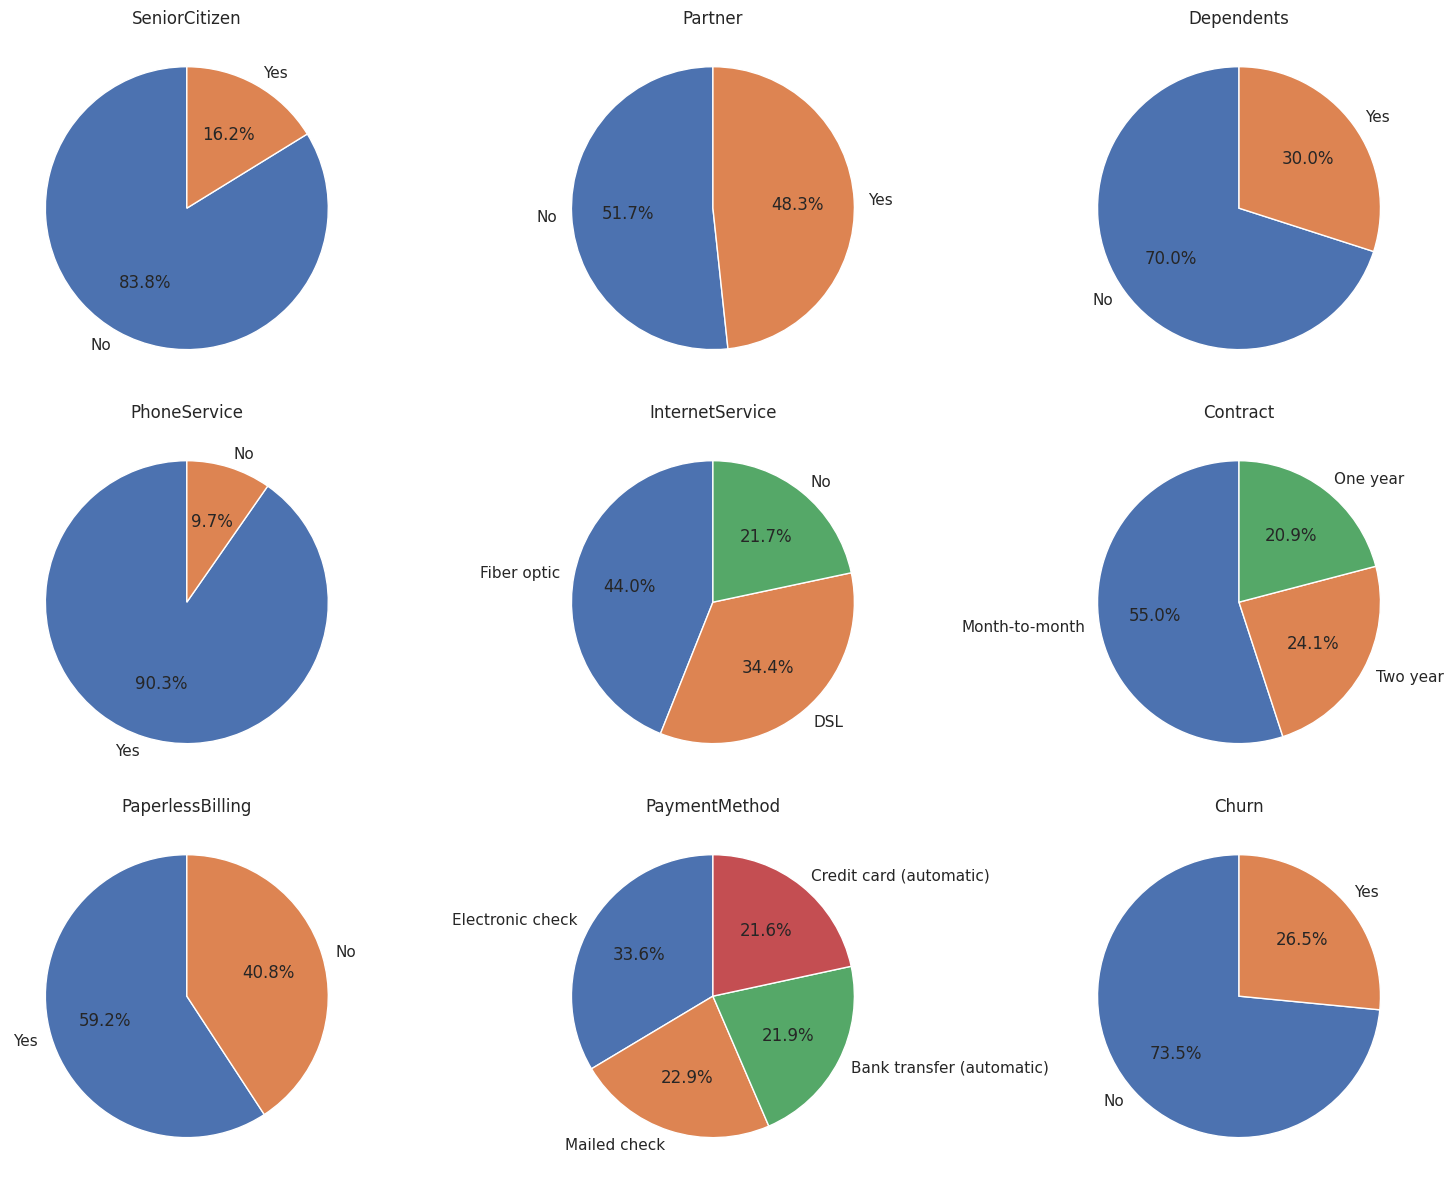

In [67]:
categorical_cols = [
    'SeniorCitizen', 'Partner', 'Dependents', 
    'PhoneService', 'InternetService', 'Contract', 
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Set up 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Create pie charts
for i, col in enumerate(categorical_cols):
    data = df[col].value_counts()
    labels = data.index
    sizes = data.values

    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{col}')

plt.tight_layout()
plt.show()

### for Numerical Variables <a class="anchor" id="numanalysis"></a>

In [68]:
# Summary stats
print(df[['Tenure', 'MonthlyCharges', 'TotalCharges']].describe())

            Tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


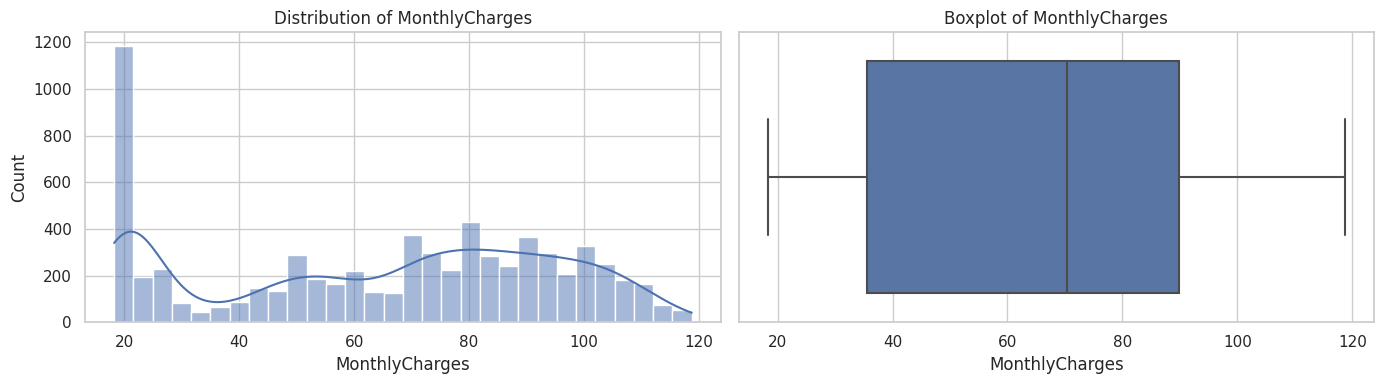

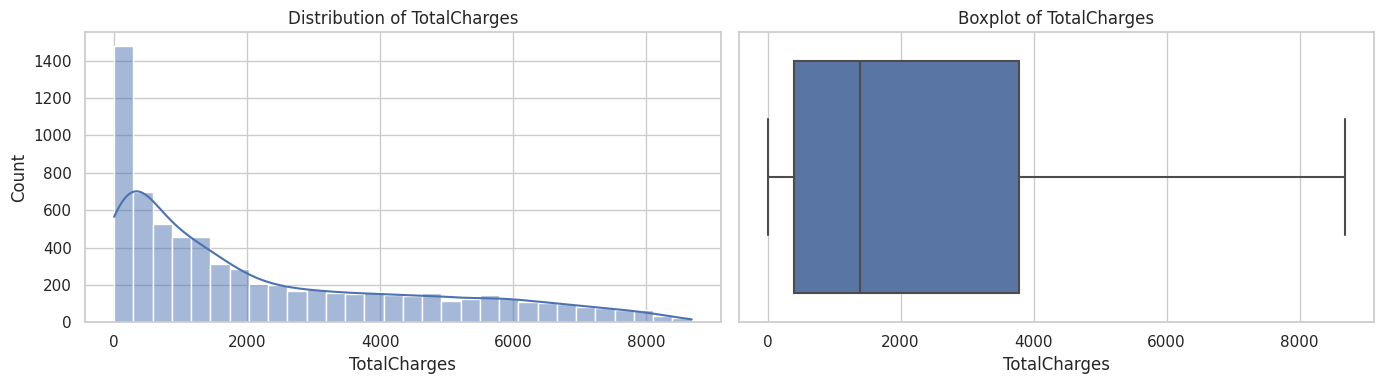

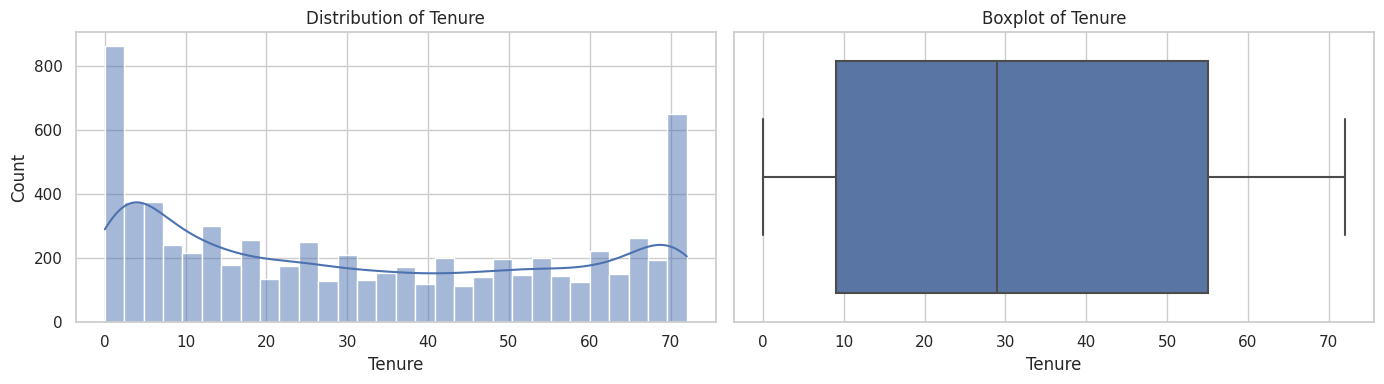

In [69]:
num_features = ['MonthlyCharges', 'TotalCharges', 'Tenure']

# Summary statistics
df[num_features].describe()

# Histograms and Boxplots
for feature in num_features:
    plt.figure(figsize=(14, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    
    plt.tight_layout()
    plt.show()

## Correlation Analysis <a class="anchor" id="correlation"></a>

In [70]:
#import label encoder
from sklearn import preprocessing 

df1 = df.copy()
label_encoder = preprocessing.LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1['SeniorCitizen'] = label_encoder.fit_transform(df1['SeniorCitizen'])
df1['Partner'] = label_encoder.fit_transform(df1['Partner'])
df1['Dependents'] = label_encoder.fit_transform(df1['Dependents'])
df1['PhoneService'] = label_encoder.fit_transform(df1['PhoneService'])
df1['MultipleLines'] = label_encoder.fit_transform(df1['MultipleLines'])
df1['InternetService'] = label_encoder.fit_transform(df1['InternetService'])
df1['OnlineSecurity'] = label_encoder.fit_transform(df1['OnlineSecurity'])
df1['OnlineBackup'] = label_encoder.fit_transform(df1['OnlineBackup'])
df1['DeviceProtection'] = label_encoder.fit_transform(df1['DeviceProtection'])
df1['TechSupport'] = label_encoder.fit_transform(df1['TechSupport'])
df1['StreamingTV'] = label_encoder.fit_transform(df1['StreamingTV'])
df1['StreamingMovies'] = label_encoder.fit_transform(df1['StreamingMovies'])
df1['Contract'] = label_encoder.fit_transform(df1['Contract'])
df1['PaperlessBilling'] = label_encoder.fit_transform(df1['PaperlessBilling'])
df1['PaymentMethod'] = label_encoder.fit_transform(df1['PaymentMethod'])
df1['Churn'] = label_encoder.fit_transform(df1['Churn'])
df1.drop('customerID', axis = 1, inplace = True)
df1.drop('HasInternetExtras', axis = 1, inplace = True)

df1.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [71]:
fig = px.imshow(df1.corr())
fig.show()

In [72]:
df[['Tenure', 'MonthlyCharges', 'TotalCharges']].corr()

,Tenure,MonthlyCharges,TotalCharges
Tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


In [73]:
correlation_matrix = df.corr(numeric_only=True)

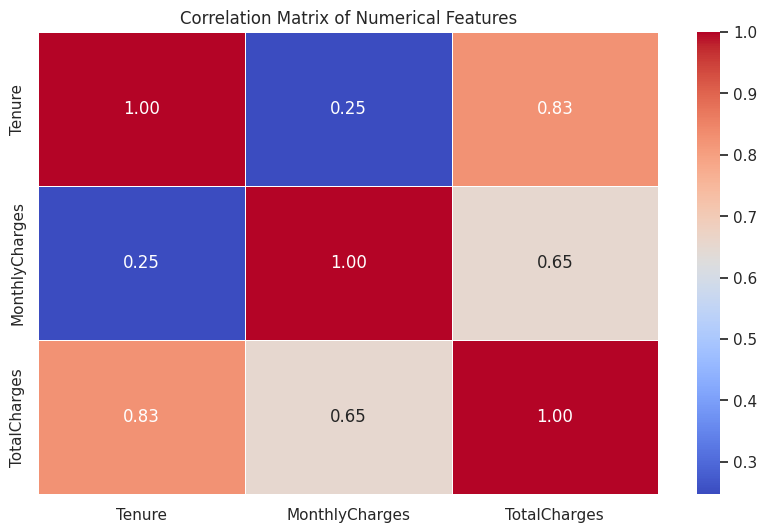

In [74]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Key Insight:**

This shows how **highly correlated 'Tenure' and 'TotalCharges'** are, which is true, because total charges for customers are the duration they subscribed * monthly charges.

## Multivariate Analysis <a class="anchor" id="multi"></a>

### Churn vs Numeric Features <a class="anchor" id="vsnum"></a>

In [75]:
# Average values grouped by churn status
print(df.groupby('Churn')[num_features].mean())

       MonthlyCharges  TotalCharges     Tenure
Churn                                         
No          61.265124   2549.911442  37.569965
Yes         74.441332   1531.796094  17.979133


In [76]:
pd.crosstab(df['HasInternetExtras'], df['Churn'], values=df['MonthlyCharges'], aggfunc='mean')

Churn,No,Yes
HasInternetExtras,,
No,27.666628,51.614421
Yes,78.348440,82.219512


**Without extras**, higher monthly charges are strongly associated with churn. Possibly because these customers are paying for services they don’t get or are frustrated.

**With extras**, churners also pay more but the difference is smaller, which might reflect service dissatisfaction or other factors.

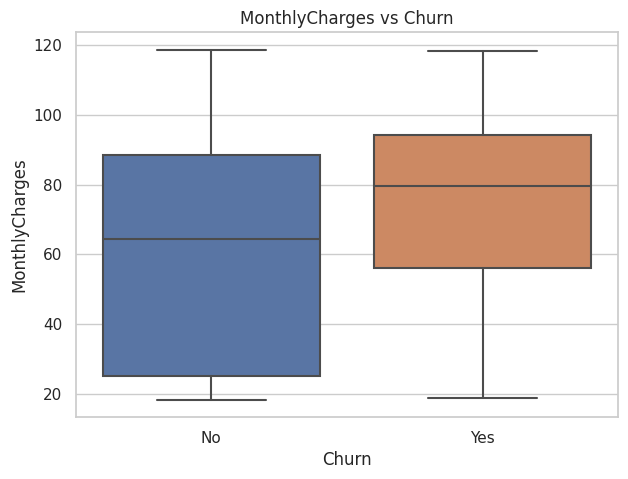

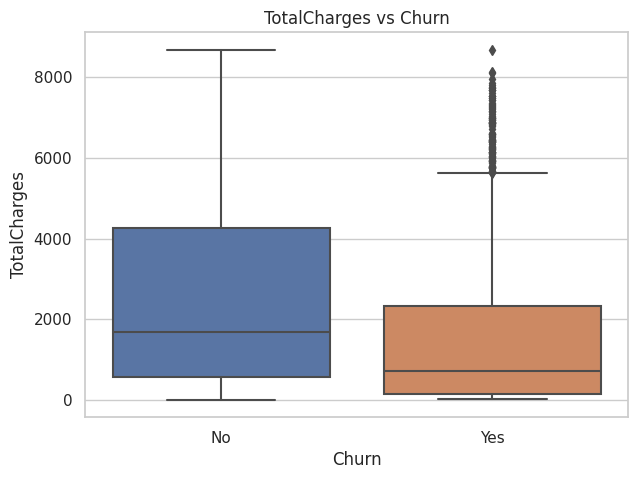

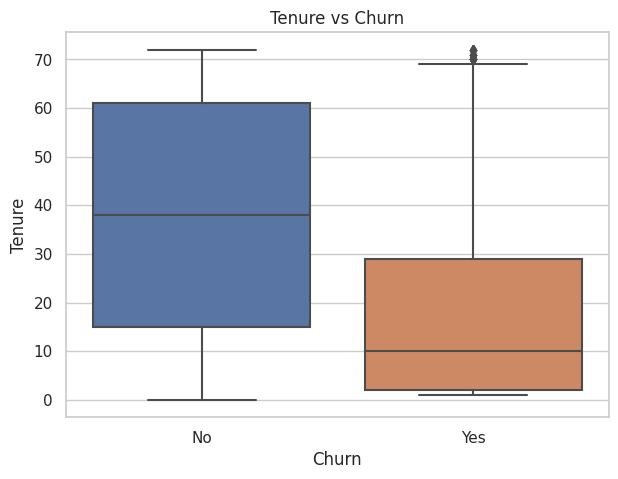

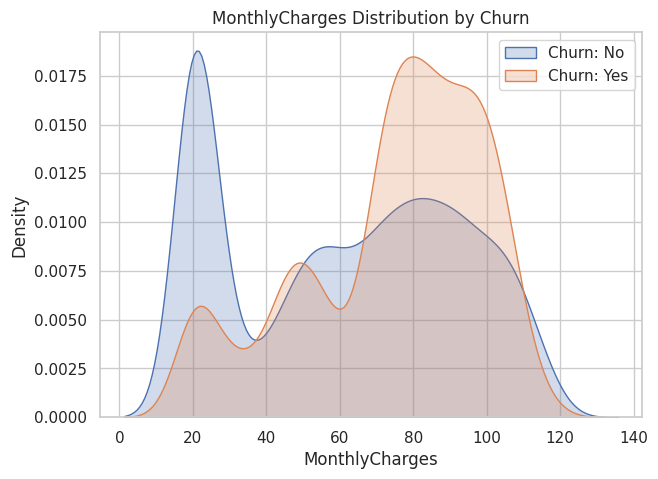

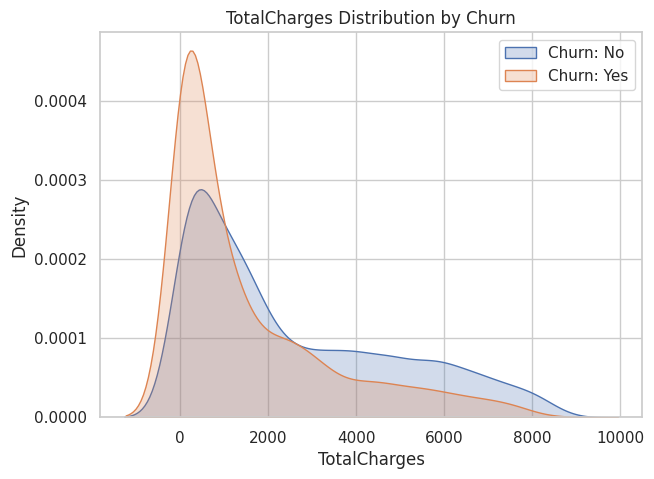

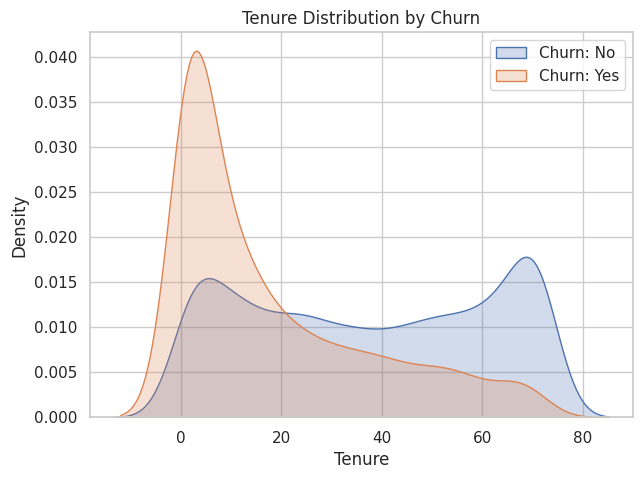

In [77]:
# Boxplots of numerical features grouped by churn
for feature in num_features:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=df, x='Churn', y=feature)
    plt.title(f'{feature} vs Churn')
    plt.show()

# KDE plots to compare churn distributions
for feature in num_features:
    plt.figure(figsize=(7, 5))
    sns.kdeplot(data=df[df['Churn'] == 'No'][feature], label='Churn: No', fill=True)
    sns.kdeplot(data=df[df['Churn'] == 'Yes'][feature], label='Churn: Yes', fill=True)
    plt.title(f'{feature} Distribution by Churn')
    plt.legend()
    plt.show()

### Churn vs Categorical Features <a class="anchor" id="vscat"></a>

In [78]:
def plot_percentage_churn(col, ax=None):
    # percentage for churn per category
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).rename('Percentage').reset_index()
    churn_rate['Percentage'] *= 100 

    # actual counts for churn per category
    churn_counts = df.groupby(col)['Churn'].value_counts().rename('Count').reset_index()

    # merge to have both Percentage and Count in one dataframe
    merged = pd.merge(churn_rate, churn_counts, on=[col, 'Churn'])
    merged = merged.sort_values(by=['Churn', col], ascending=[True, True])
    
    plt.figure(figsize=(4, 3))
    ax = sns.barplot(data=merged, x=col, y='Percentage', hue='Churn', palette='coolwarm', ax=ax)

    for p, (_, row) in zip(ax.patches, merged.iterrows()):
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2
        ax.annotate(
            f'{height:.1f}% ({row["Count"]})',
            (x, height + 1),
            ha='center',
            va='bottom',
            fontsize=8
        )
        
    ax.tick_params(axis='x', rotation=10)
    return ax

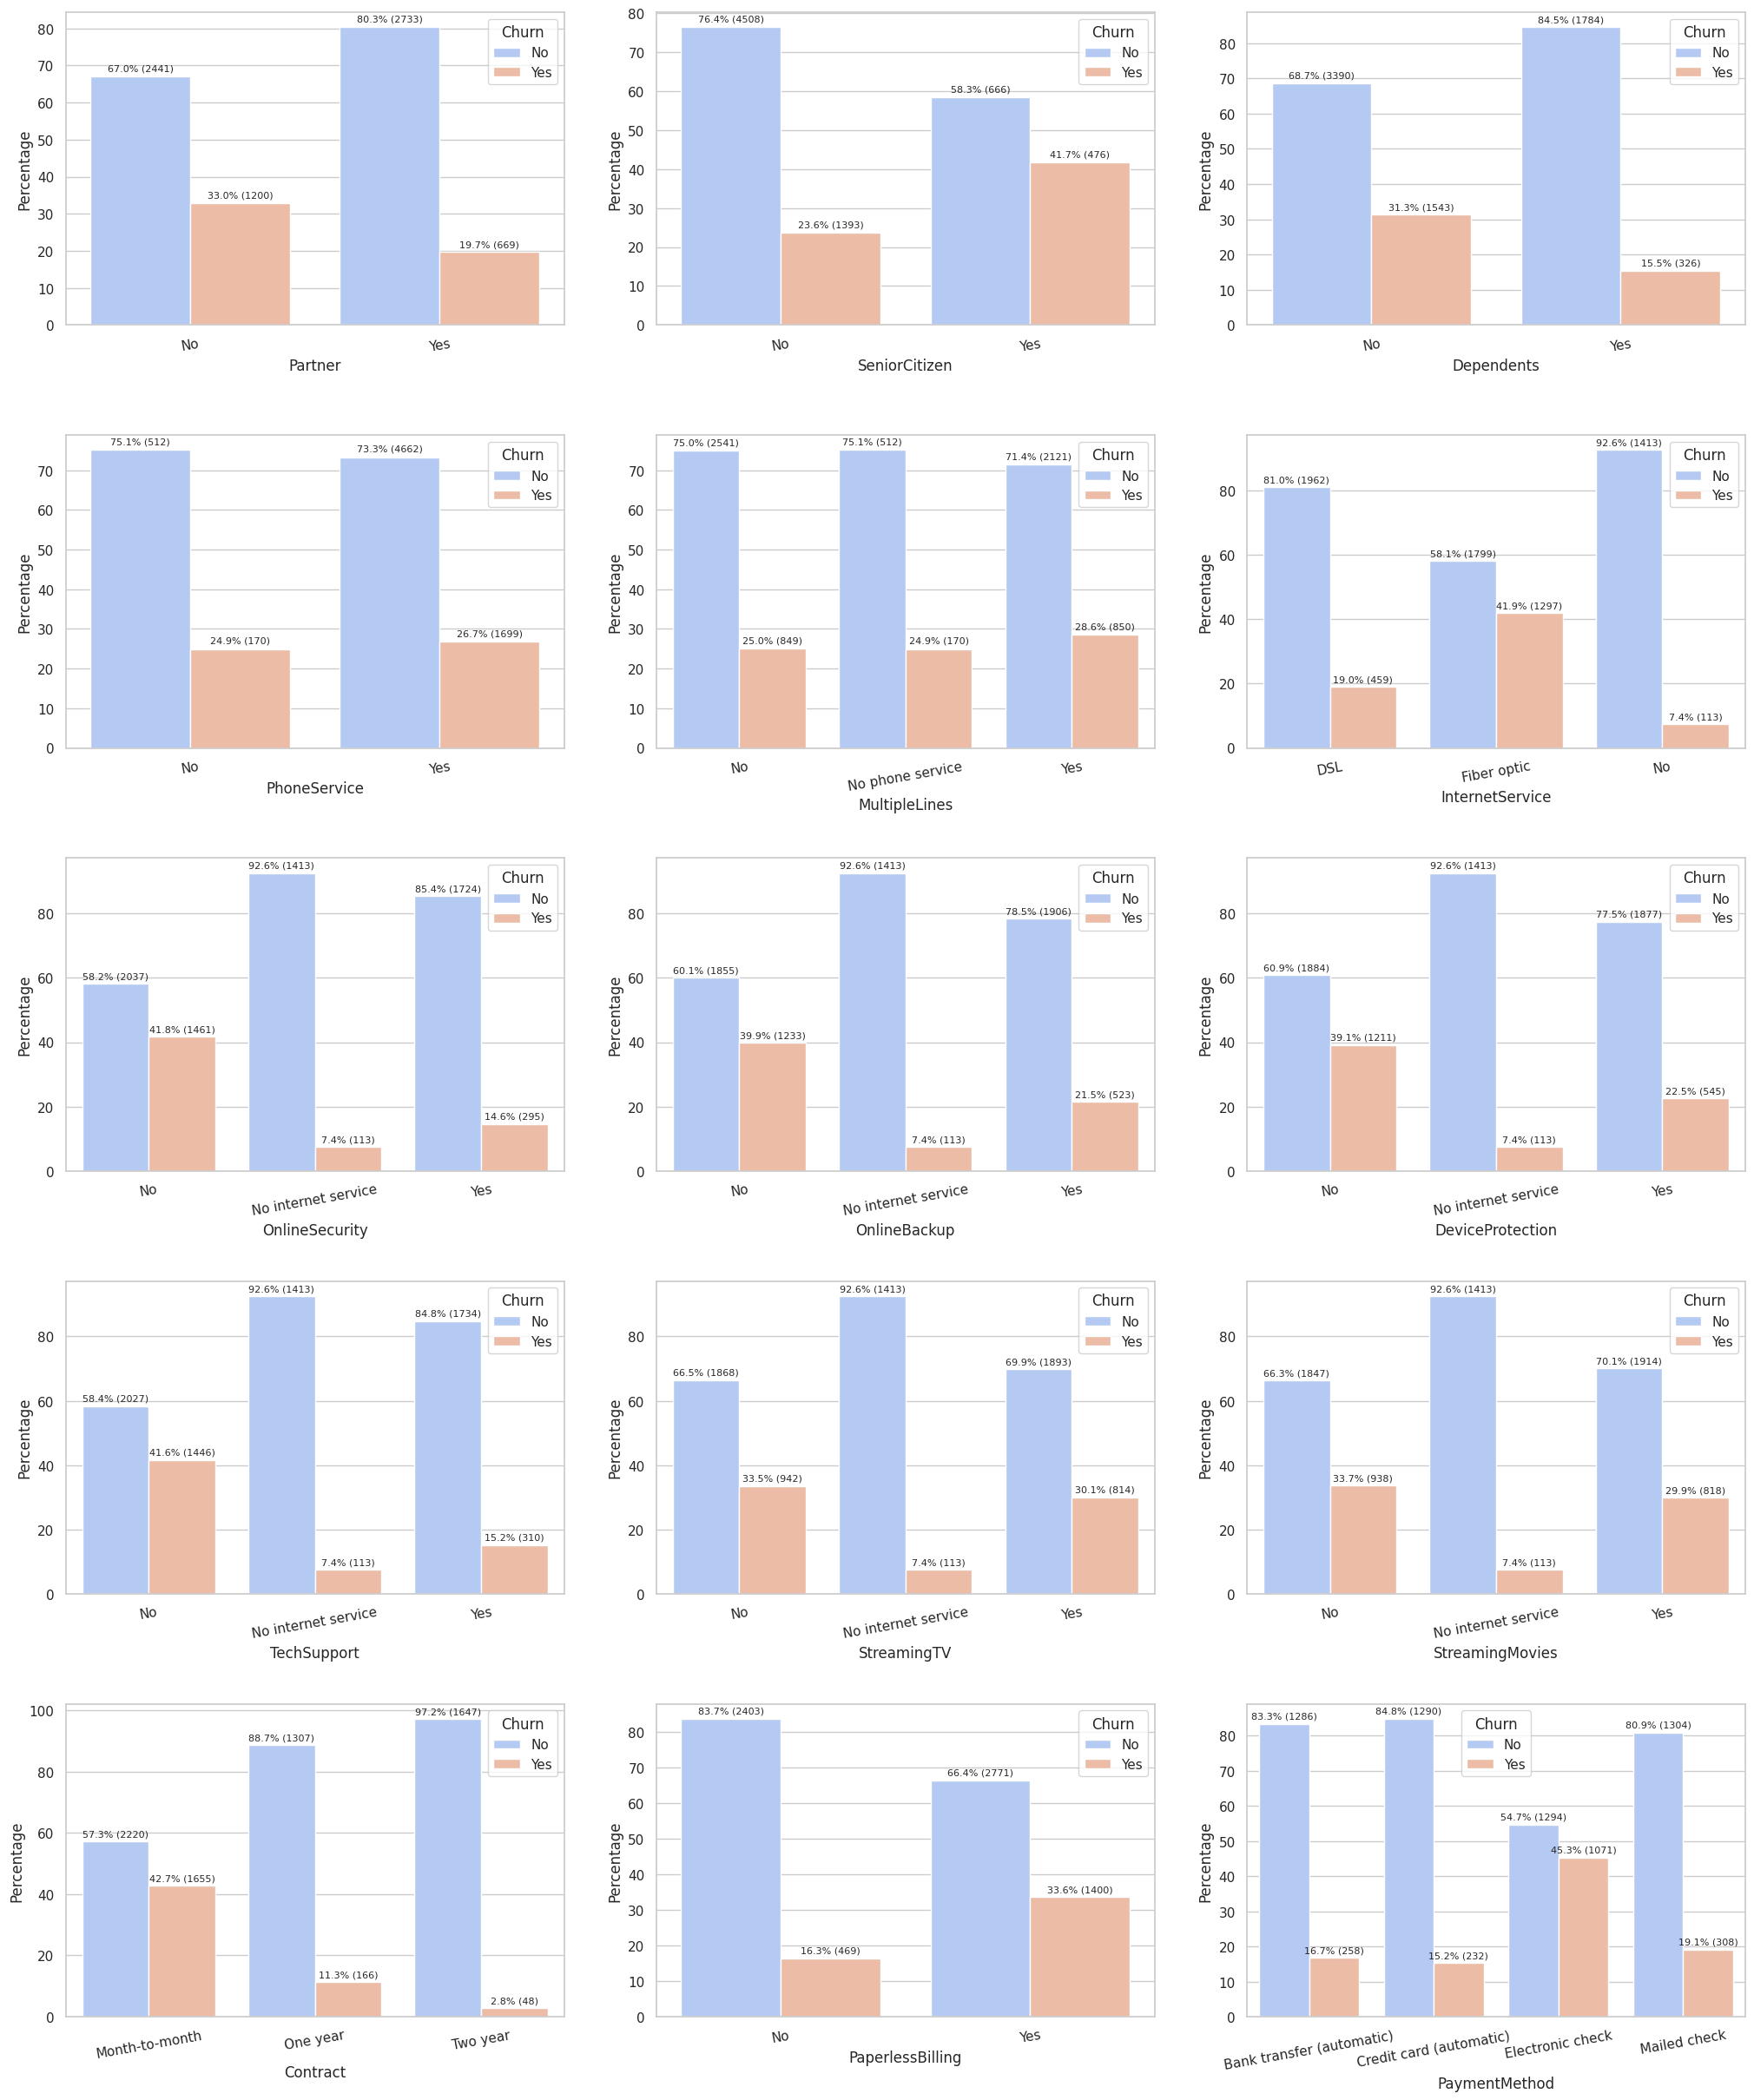

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

In [79]:
service_cols = ['Partner', 'SeniorCitizen', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(21, 25))
axes = axes.flatten()

for i, col in enumerate(service_cols):
    plot_percentage_churn(col, ax=axes[i])

fig.tight_layout(pad=3.0)
plt.show()

## Statistical Test (Chi-Square Test for Independence) <a class="anchor" id="chisquare"></a>

In [80]:
from scipy.stats import chi2_contingency

# Chi-Square test between Contract and Churn
contingency_table = pd.crosstab(df['Contract'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Variables are associated")
else:
    print("Fail to reject null hypothesis - Variables are independent")

Chi-Square statistic: 1184.5965720837926
P-value: 5.863038300673391e-258
Variables are associated


In [81]:
contingency_table = pd.crosstab(df['InternetService'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Variables are associated")
else:
    print("Fail to reject null hypothesis - Variables are independent")

Chi2 Statistic: 732.309589667794
P-value: 9.571788222840544e-160
Variables are associated


## Cramér's V <a class="anchor" id="cramers"></a>
Measures strength of association between two categorical variables (0 = no association, 1 = perfect association).
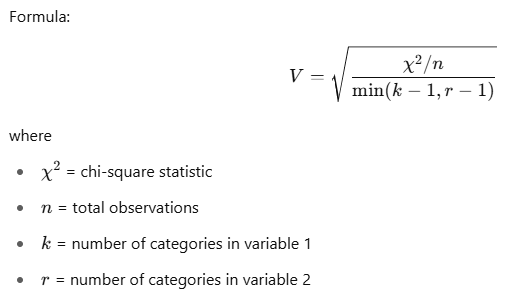

In [82]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))    
    r_corr = r - ((r-1)**2) / (n-1)
    k_corr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

In [83]:
categorical_cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod','HasInternetExtras']

results = []

for col in categorical_cols:
    confusion_matrix = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, ex = chi2_contingency(confusion_matrix)
    cramer_v = cramers_v(confusion_matrix)
    results.append({'Feature': col, 'Chi2': chi2, 'p-value': p, 'Cramers_V': cramer_v})

results_df = pd.DataFrame(results).sort_values(by='Cramers_V', ascending=False)
print(results_df)

              Feature         Chi2        p-value  Cramers_V
13           Contract  1184.596572  5.863038e-258   0.409798
7      OnlineSecurity   849.998968  2.661150e-185   0.347016
10        TechSupport   828.197068  1.443084e-180   0.342526
6     InternetService   732.309590  9.571788e-160   0.322037
15      PaymentMethod   648.142327  3.682355e-140   0.302677
8        OnlineBackup   601.812790  2.079759e-131   0.291850
9    DeviceProtection   558.419369  5.505219e-122   0.281095
12    StreamingMovies   375.661479   2.667757e-82   0.230351
11        StreamingTV   374.203943   5.528994e-82   0.229902
14   PaperlessBilling   258.277649   4.073355e-58   0.191141
3          Dependents   189.129249   4.924922e-43   0.163448
1       SeniorCitizen   159.426300   1.510067e-36   0.149991
2             Partner   158.733382   2.139911e-36   0.149663
16  HasInternetExtras    43.367042   4.537671e-11   0.077565
5       MultipleLines    11.330441   3.464383e-03   0.036400
4        PhoneService   

## Churn vs Contract + Payment Method <a class="anchor" id="contract"></a>

In [84]:
pd.crosstab(df['Contract'], df['Churn'], margins=True)

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


In [85]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index')

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


<Axes: xlabel='Contract', ylabel='count'>

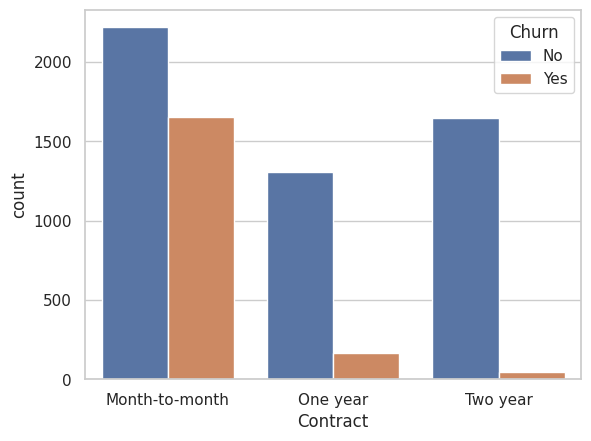

In [86]:
sns.countplot(data=df, x='Contract', hue='Churn')

In [87]:
pd.crosstab(df['Contract'], df['PaymentMethod'], normalize='index')

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Contract,,,,
Month-to-month,0.152000,0.140129,0.477419,0.230452
One year,0.265445,0.270197,0.235574,0.228785
Two year,0.332743,0.342773,0.099115,0.225369


### Key Insight:

Most people who are sure and subscribing **long-term (two years)** opted for **automatic payment**, such as bank transfer and credit card. 

Meanwhile, **month-to-month** subscribers are more interested in the **electronic check**.

## Churn vs Paperless Billing + Senior Citizen <a class="anchor" id="paperless"></a>

In [88]:
churn_counts = df.groupby(['PaperlessBilling', 'Churn']).size().unstack(fill_value=0)
churn_counts['Total'] = churn_counts.sum(axis=1)
churn_counts['ChurnRate'] = churn_counts['Yes'] / churn_counts['Total'] * 100
churn_counts

Churn,No,Yes,Total,ChurnRate
PaperlessBilling,,,,
No,2403,469,2872,16.330084
Yes,2771,1400,4171,33.565092


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

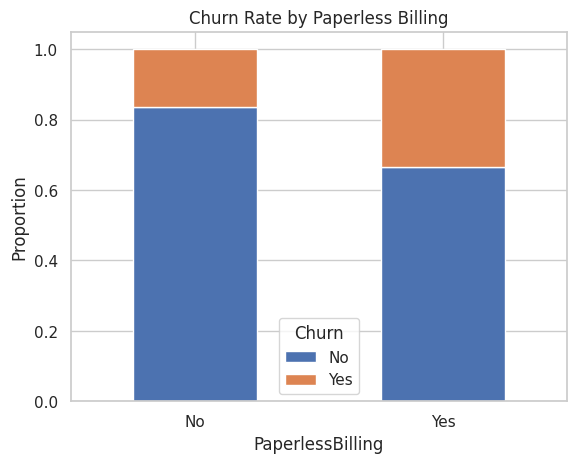

In [89]:
churn_by_paperless = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack()
churn_by_paperless.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Paperless Billing')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

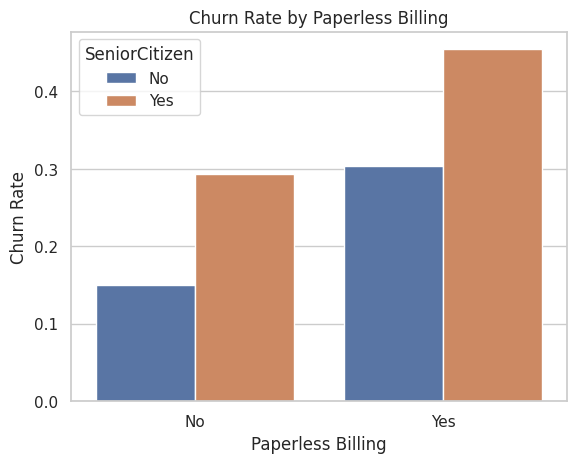

In [90]:
df_churned = df.copy()
df_churned['Churn'] = df_churned['Churn'].map({'Yes': 1, 'No': 0}).astype(float)

sns.barplot(
    data=df_churned,
    x='PaperlessBilling',
    y='Churn', hue='SeniorCitizen',
    estimator=lambda x: sum(x) / len(x),  # Churn rate
    errorbar=None
)
plt.title('Churn Rate by Paperless Billing')
plt.ylabel('Churn Rate')
plt.xlabel('Paperless Billing')
plt.show()

In [91]:
grouped = df_churned.groupby(['PaperlessBilling', 'SeniorCitizen'])['Churn'].agg(['count', 'sum'])

grouped = grouped.rename(columns={'count': 'Total', 'sum': 'Churned'})
grouped['ChurnRate (%)'] = (grouped['Churned'] / grouped['Total']) * 100

print(grouped.reset_index().sort_values(by='ChurnRate (%)', ascending=False))

  PaperlessBilling SeniorCitizen  Total  Churned  ChurnRate (%)
3              Yes           Yes    876    398.0      45.433790
2              Yes            No   3295   1002.0      30.409712
1               No           Yes    266     78.0      29.323308
0               No            No   2606    391.0      15.003837


**Key Insights:**

**Paperless Billing:**
Customers who opt for PaperlessBilling have higher churn rates, especially when they are senior citizens (45.43%) compared to non-seniors (30.41%). This suggests paperless billing users may be more **transactional**, with less engagement and loyalty.

**Senior Citizens:**
Senior citizens churn more than non-seniors across both billing types. For example, among those with paper billing, seniors churn at 29.32%, nearly double the 15.00% for non-seniors. Age may influence digital adoption, service expectations, or sensitivity to issues.

## Churn vs HasInternetExtras <a class="anchor" id="addons"></a>

In [92]:
percentages = df['HasInternetExtras'].value_counts(normalize=True) * 100

print("\nPercentages of customers with internet extras:")
print(percentages)

internet_extra_churn_pct = pd.crosstab(df['HasInternetExtras'], df['Churn'], normalize='index') * 100
print("\nPercentages by HasInternetExtras and Churn:")
print(internet_extra_churn_pct)


Percentages of customers with internet extras:
HasInternetExtras
Yes    68.49354
No     31.50646
Name: proportion, dtype: float64

Percentages by HasInternetExtras and Churn:
Churn                     No        Yes
HasInternetExtras                      
No                 78.593961  21.406039
Yes                71.102819  28.897181


In [93]:
avg_monthly_charges = df.groupby(['HasInternetExtras', 'Churn'])['MonthlyCharges'].mean().reset_index()
print(avg_monthly_charges)

  HasInternetExtras Churn  MonthlyCharges
0                No    No       27.666628
1                No   Yes       51.614421
2               Yes    No       78.348440
3               Yes   Yes       82.219512


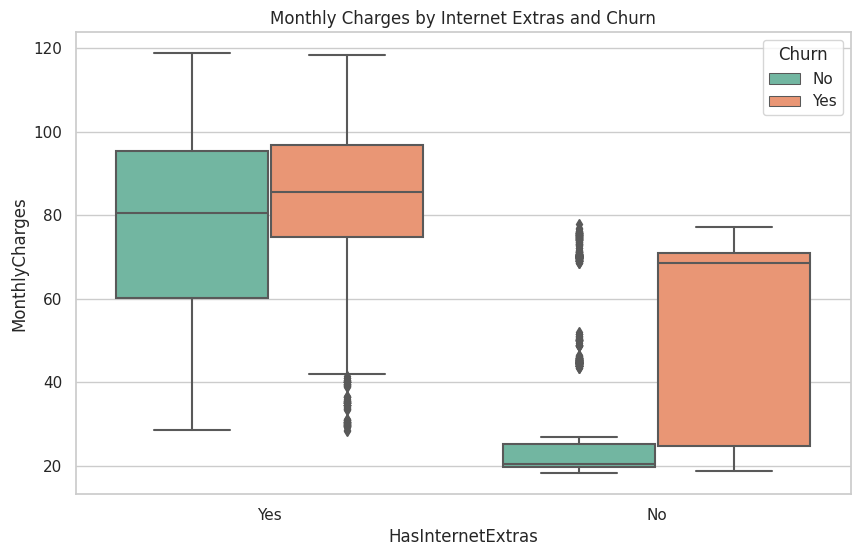

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='HasInternetExtras', y='MonthlyCharges', hue='Churn', palette='Set2')
plt.title('Monthly Charges by Internet Extras and Churn')
plt.show()

In [95]:
adds_on_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

churn_data = []

for col in adds_on_cols:
    churn_rates = df.groupby(col)['Churn'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    churn_yes = churn_rates[(churn_rates[col] == 'Yes') & (churn_rates['Churn'] == 'Yes')]['percent'].values[0] if not churn_rates[(churn_rates[col] == 'Yes') & (churn_rates['Churn'] == 'Yes')].empty else 0
    churn_no = churn_rates[(churn_rates[col] == 'No') & (churn_rates['Churn'] == 'Yes')]['percent'].values[0] if not churn_rates[(churn_rates[col] == 'No') & (churn_rates['Churn'] == 'Yes')].empty else 0
    churn_data.append([col, f"{churn_yes:.2f}%", f"{churn_no:.2f}%"])

churn_df = pd.DataFrame(churn_data, columns=['Feature', 'Churn % (Yes)', 'Churn % (No)'])
print(churn_df.to_string(index=False))

         Feature Churn % (Yes) Churn % (No)
   MultipleLines        28.61%       25.04%
  OnlineSecurity        14.61%       41.77%
    OnlineBackup        21.53%       39.93%
DeviceProtection        22.50%       39.13%
     TechSupport        15.17%       41.64%
     StreamingTV        30.07%       33.52%
 StreamingMovies        29.94%       33.68%


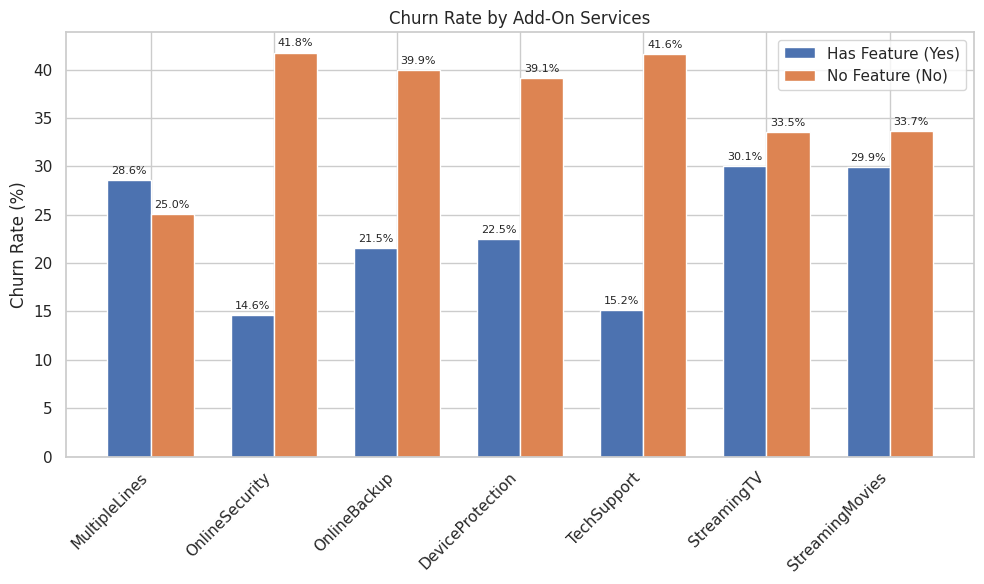

In [96]:
churn_df['Churn % (Yes)'] = churn_df['Churn % (Yes)'].str.rstrip('%').astype(float)
churn_df['Churn % (No)'] = churn_df['Churn % (No)'].str.rstrip('%').astype(float)

features = churn_df['Feature']
x = np.arange(len(features)) 
width = 0.35 

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, churn_df['Churn % (Yes)'], width, label='Has Feature (Yes)')
bars2 = ax.bar(x + width/2, churn_df['Churn % (No)'], width, label='No Feature (No)')

ax.set_ylabel('Churn Rate (%)')
ax.set_title('Churn Rate by Add-On Services')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha='right')
ax.legend()

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### Key Insights:
* Security & Support Features (e.g., OnlineSecurity, TechSupport) are strongly linked to lower churn (15–22%) compared to customers without them (~42%).
* Streaming Services (e.g., StreamingTV, StreamingMovies) show slightly lower churn, but the effect is less significant (~30% vs. 33.5%).
* Monthly Charges are a key churn factor:
    * Customers without extras who churn pay much more (~51.6) than those who stay (~27.7).
    * Customers with extras pay more overall (~78–82), but churners and non-churners differ less in charges.
* **Protective/support services improve retention. High charges without added value drive churn, especially among customers lacking extras.**

## Churn vs Customer's Identity <a class="anchor" id="custid"></a>

In [97]:
pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

Churn,No,Yes
SeniorCitizen,,
No,76.393832,23.606168
Yes,58.318739,41.681261


In [98]:
grouped = df.groupby(['SeniorCitizen', 'Dependents', 'Partner', 'Churn']).size().reset_index(name='Count')
total_counts = df.groupby(['SeniorCitizen', 'Dependents', 'Partner']).size().reset_index(name='Total')
merged = pd.merge(grouped, total_counts, on=['SeniorCitizen', 'Dependents', 'Partner'])

merged['ChurnRate'] = merged['Count'] / merged['Total'] * 100
churn_rates = merged[merged['Churn'] == 'Yes'].sort_values(by='ChurnRate', ascending=False)

print(churn_rates[['SeniorCitizen', 'Dependents', 'Partner', 'Count', 'Total', 'ChurnRate']])

   SeniorCitizen Dependents Partner  Count  Total  ChurnRate
9            Yes         No      No    276    561  49.197861
11           Yes         No     Yes    178    490  36.326531
1             No         No      No    847   2719  31.151159
13           Yes        Yes      No      2      8  25.000000
15           Yes        Yes     Yes     20     83  24.096386
5             No        Yes      No     75    353  21.246459
3             No         No     Yes    242   1163  20.808255
7             No        Yes     Yes    229   1666  13.745498


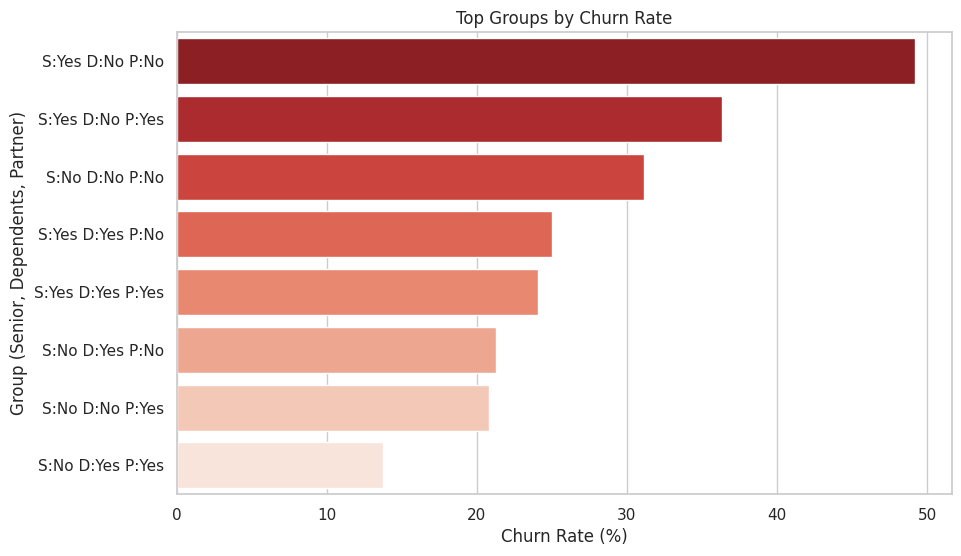

In [99]:
top_churn = churn_rates.head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_churn,
    x='ChurnRate',
    y=top_churn.apply(lambda row: f"S:{row['SeniorCitizen']} D:{row['Dependents']} P:{row['Partner']}", axis=1),
    palette='Reds_r'
)
plt.xlabel('Churn Rate (%)')
plt.ylabel('Group (Senior, Dependents, Partner)')
plt.title('Top Groups by Churn Rate')
plt.show()

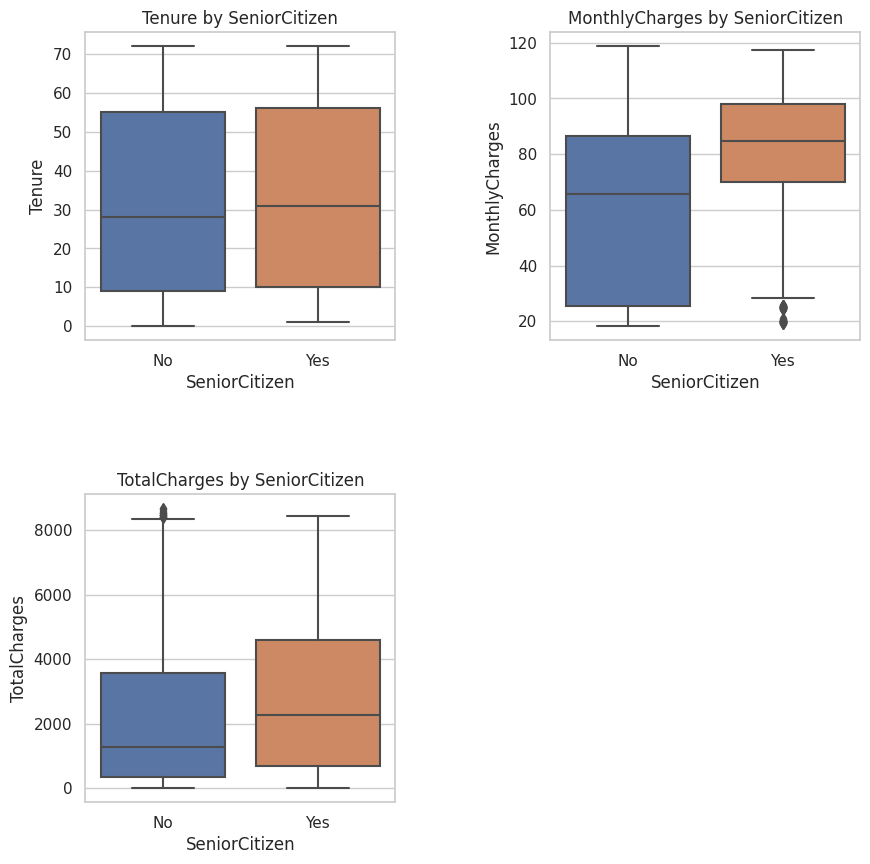

In [100]:
numeric = ['Tenure', 'MonthlyCharges', 'TotalCharges']
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i in range(len(numeric)):
    sns.boxplot(x='SeniorCitizen', y=numeric[i], data=df, ax=axs.flat[i])
    axs.flat[i].set_title(f'{numeric[i]} by SeniorCitizen')

# Hide the unused subplot (4th one)
if len(numeric) < len(axs.flat):
    for j in range(len(numeric), len(axs.flat)):
        fig.delaxes(axs.flat[j])

plt.show()

<Axes: title={'center': 'Variable Dependents'}, xlabel='Dependents', ylabel='count'>

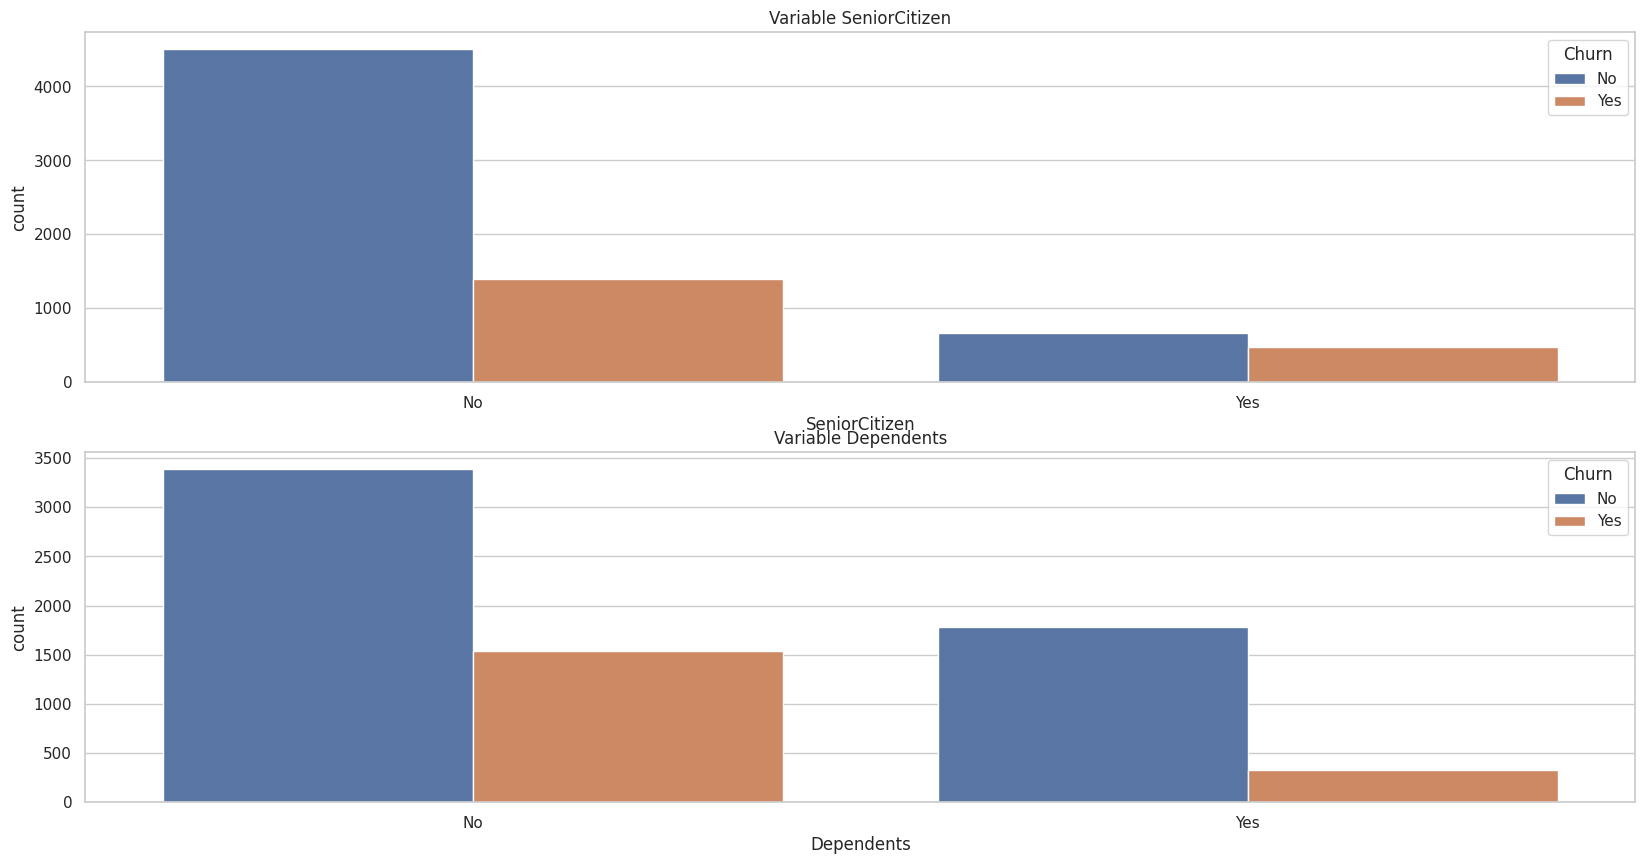

In [101]:
plt.figure(figsize = (20, 10))
plt.subplot(2, 1, 1)
plt.gca().set_title('Variable SeniorCitizen')
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable Dependents')
sns.countplot(x = 'Dependents', hue = 'Churn', data = df)

In [102]:
top_churn_group = df[
    (df['SeniorCitizen'] == 'Yes') &
    (df['Dependents'] == 'No')
]

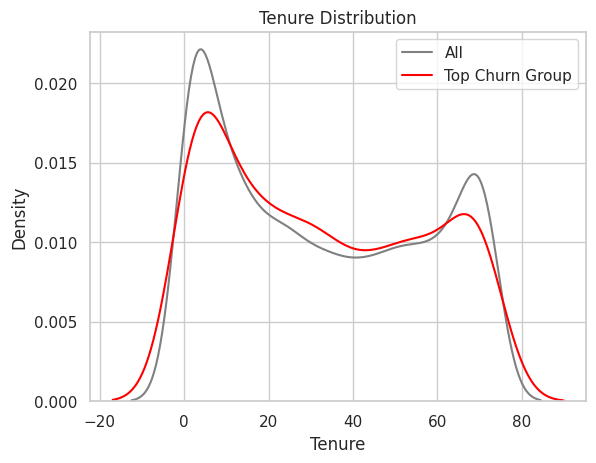

In [103]:
sns.kdeplot(data=df, x='Tenure', label='All', color='gray')
sns.kdeplot(data=top_churn_group, x='Tenure', label='Top Churn Group', color='red')
plt.title('Tenure Distribution')
plt.legend()
plt.show()

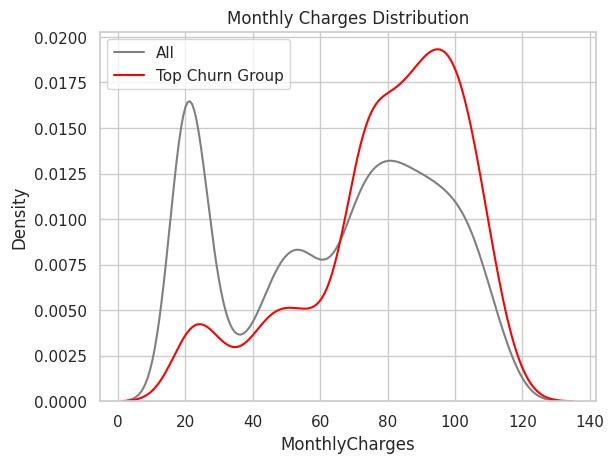

In [104]:
sns.kdeplot(data=df, x='MonthlyCharges', label='All', color='gray')
sns.kdeplot(data=top_churn_group, x='MonthlyCharges', label='Top Churn Group', color='red')
plt.title('Monthly Charges Distribution')
plt.legend()
plt.show()

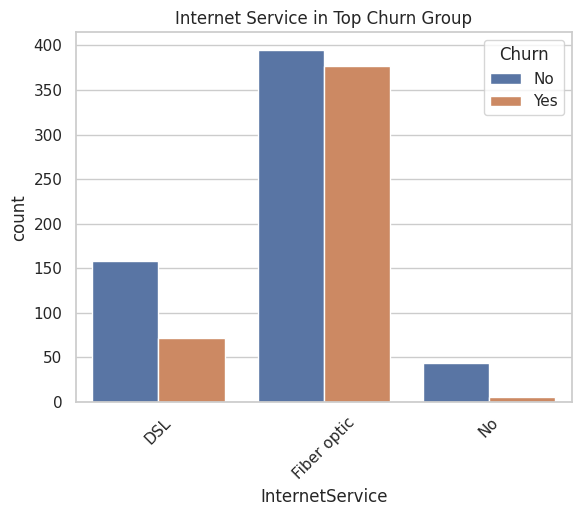

In [105]:
sns.countplot(data=top_churn_group, x='InternetService', hue='Churn')
plt.title('Internet Service in Top Churn Group')
plt.xticks(rotation=45)
plt.show()

In [106]:
extras = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for extra in extras:
    print(f"\n{extra} distribution in top churn group:")
    print(top_churn_group[extra].value_counts(normalize=True) * 100)


OnlineSecurity distribution in top churn group:
OnlineSecurity
No                     71.646051
Yes                    23.691722
No internet service     4.662226
Name: proportion, dtype: float64

OnlineBackup distribution in top churn group:
OnlineBackup
No                     54.614653
Yes                    40.723121
No internet service     4.662226
Name: proportion, dtype: float64

DeviceProtection distribution in top churn group:
DeviceProtection
No                     55.566127
Yes                    39.771646
No internet service     4.662226
Name: proportion, dtype: float64

TechSupport distribution in top churn group:
TechSupport
No                     73.929591
Yes                    21.408183
No internet service     4.662226
Name: proportion, dtype: float64

StreamingTV distribution in top churn group:
StreamingTV
Yes                    49.286394
No                     46.051380
No internet service     4.662226
Name: proportion, dtype: float64

StreamingMovies distribution in

Text(0.5, 1.0, 'Monthly Charges by Internet Service & Extras')

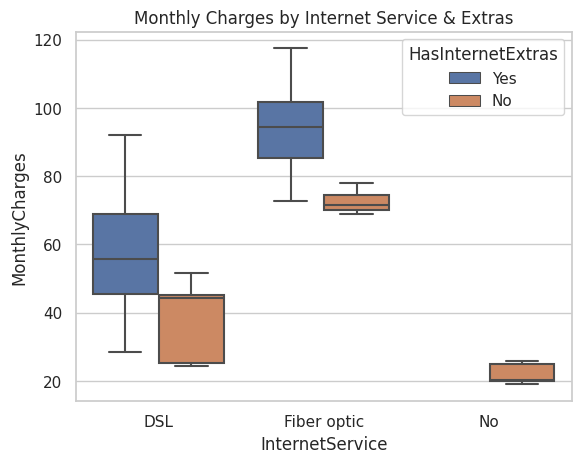

In [107]:
sns.boxplot(data=top_churn_group, x='InternetService', y='MonthlyCharges', hue='HasInternetExtras')
plt.title('Monthly Charges by Internet Service & Extras')

### Key Insight:
**What might be causing the churn in this group?**
* **High monthly charges**, especially for fiber optic internet — it’s more expensive, which could cause dissatisfaction.
* Shorter tenure — newer customers churn more, might indicate they leave if expectations aren’t met quickly.
* Fiber optic users churn more — maybe issues with pricing

# Export cleaned CSV <a class="anchor" id="export"></a>

In [108]:
df.to_csv('cleaned.csv', index=False)